<a href="https://colab.research.google.com/github/PrerakPro7/BAIN-24/blob/main/A2_220818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

In [ ]:
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial and beta distributions
import preliz as pz # defining priors
from cycler import cycler
import math

**Question 1** : In the folowing definition of a probabilistic model:

$Y \sim \mathcal{N}(\mu, \sigma)$

$\mu \sim \mathcal{N}(0, 2)$

$\sigma \sim \mathcal{halfnormal}(0.75)$

1.1 - Identify the prior and the likelihood.

1.2  - How many parameters will the posterior have?

1.3 - Compare it with the model for the coin-flipping problem.

1.4 - Write Bayes' theorem for the model.


1.1  Since the likelihood shows how likely the data is given certain parameters, thus,

$Likelihood=Y ∼ \mathcal{N}(\mu, \sigma)$

Since the prior represents what we already know about a parameter and we are given with their distribution, thus,

$Prior1=\mu ∼ \mathcal{N}(0,2)$

$Prior2=\sigma ∼ halfnormal(0.75)$

1.2 Since the posterior distribution is what we get after doing Bayesian analysis, the posterior distribution will be a joint distribution over these two parameters: $\mu$ and $\sigma$.

1.3 Differences between coin-flipping model and given problem model:

*   Likelihood for coin-flipping model= $X \sim Binomial(n,p)$

    Likelihood for given model= $Y \sim Normal(\mu, \sigma)$

*   Prior for coin-flipping model= $Beta(\alpha, β)$

    Prior for given model= $\mu$ and $\sigma$

*   Coin-fipping model is discrete, whereas the given model is continuous.


1.4 We know that, in Bayes' Theorem,

$P(\mu, \sigma \mid Y) = \frac{P(Y \mid \mu, \sigma) P(\mu, \sigma)}{P(Y)}$
=$\frac{P(Y \mid \mu, \sigma) P(\mu) P(\sigma)}{P(Y)}$
=$\frac{\mathcal{N}(Y| \mu, \sigma) . \mathcal{N}(0,2) . halfnormal(0.75)}{P(Y)}$

**Question 2**

Let’s suppose that we have two coins; when we toss the first coin, half of the time it lands on tails
 and half of the time on heads. The other coin is a loaded coin that always lands on heads. If we take
 one of the coins at random and get a head, what is the probability that this coin is the unfair one?

$P(head | coin1) = 0.5$

$P(head | coin2) = 1$

Assuming probabilities of both coins to be 0.5, i.e.,

$P(coin1)=P(coin2)=0.5$


Using Bayes' Theorem,

$P(coin2 | head) =\frac {P(head | coin2) P(coin2)} {P(head | coin2) P(coin2)+P(head | coin1) P(coin1)}$
$=\frac {1 * 0.5} {1 * 0.5 + 0.5 * 0.5}$
$=\frac {0.5} {0.75}$
$=\frac{2} {3}$

Thus,

$P(coin2 | head) =\frac{2}{3}$

**Question 3**


Using PyMC, change the parameters of the prior Beta distribution in `our_first_model` to match those of Week 2. Compare the results.

We know that,

$P(θ | y)=Beta(α,β)Binomial(y,n,θ)=Beta(y+ α,n-y+β)$

Therefore, in order to match the parameters from our Week 2, we need to define the parameters α and β accordingly.

(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: 0.30105907090670136
        x: [ 2.475e+00  3.610e+00]
      nit: 9
      jac: [ 2.580e-03  1.028e-01]
     nfev: 29
     njev: 9)

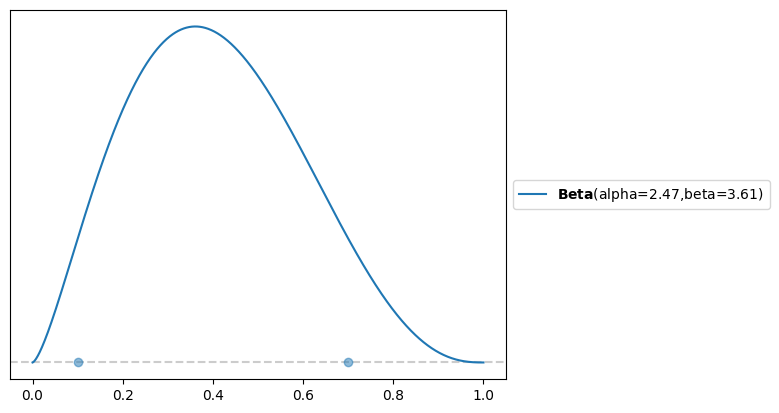

In [ ]:
dist = pz.Beta()
pz.maxent(dist, 0.1, 0.7, 0.9)

In [ ]:
#printing optimised parameters
print(dist.params)

(2.4749798056331955, 3.610398939602727)


In [ ]:
alpha_prior, beta_prior = dist.params

In [ ]:
print(alpha_prior, beta_prior)

2.4749798056331955 3.610398939602727


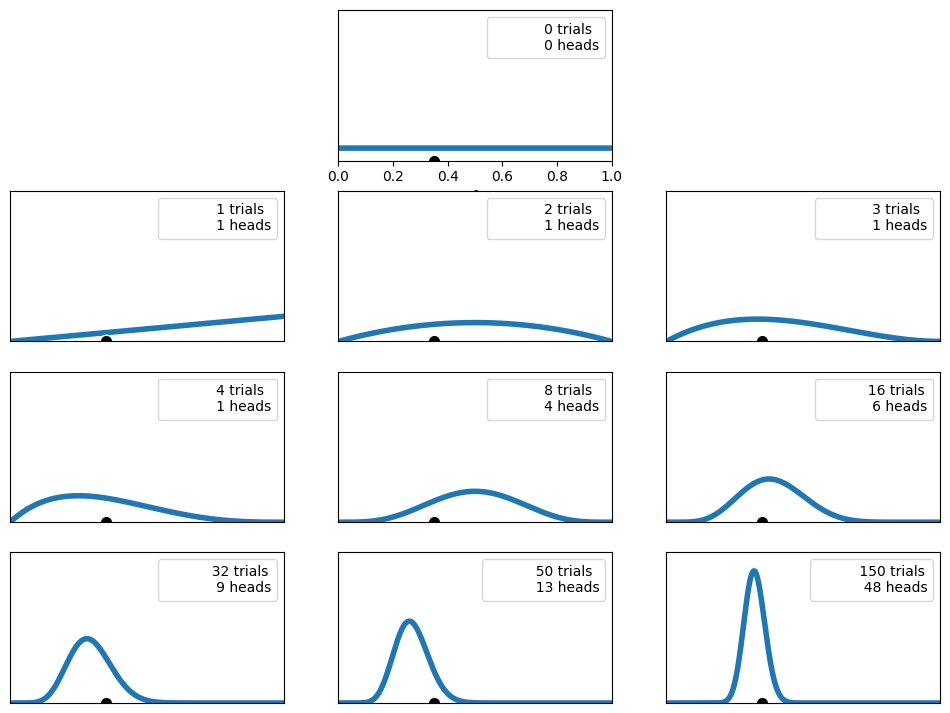

In [ ]:
#before updating the parameters
import matplotlib.pyplot as plt
from scipy.stats import beta

plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

# Use a uniform prior for all cases (α_prior = β_prior = 1)
alpha_prior = beta_prior = 1
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
  if idx == 0:
    plt.subplot(4, 3, 2)
    plt.xlabel('θ')
  else:
    plt.subplot(4, 3, idx+3)
    plt.xticks([])
  y = n_heads[idx]

  posterior = beta(alpha_prior + y, beta_prior + N - y).pdf(x)
  plt.plot(x, posterior, lw=4)

  plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
  plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
  plt.xlim(0, 1)
  plt.ylim(0, 12)
  plt.legend()
  plt.yticks([])

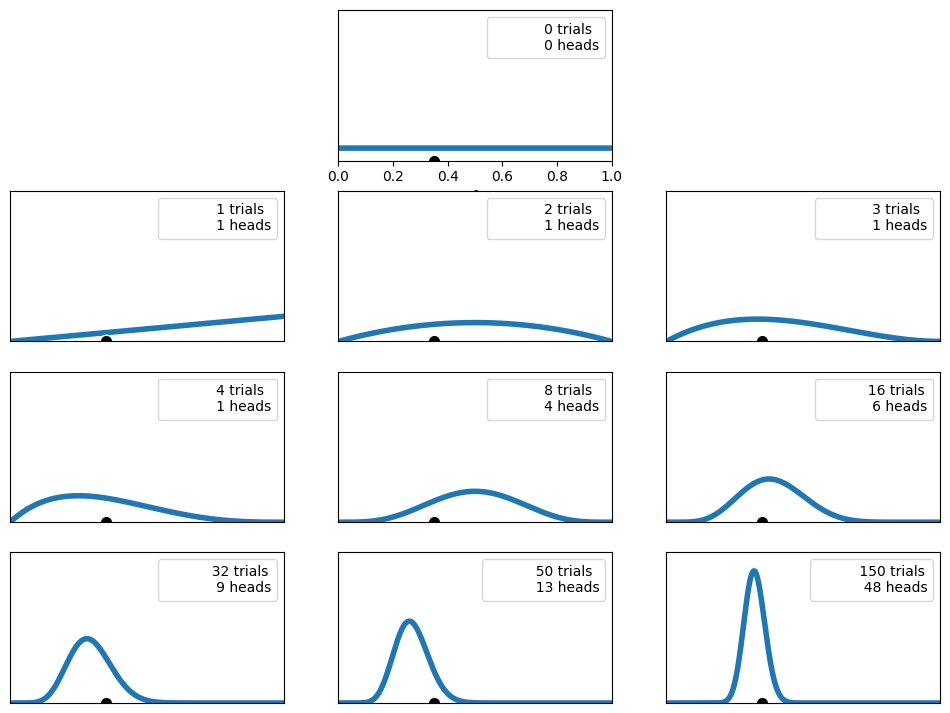

In [ ]:
#after updating the parameters

plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    posterior = pz.Beta(alpha_prior + y, beta_prior + N - y).pdf(x)
    plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

Upon comparison, we observe that the posterior distribution in uniform prior and optimal prior is the same.